# Dataset

O dataset das flores Iris ou Iris de Fisher é um dataset mutivariável introduzido pelo estatistico e biólogo britânico Ronald Fisher em um artigo de 1936. O dataset consiste de 50 exemplos de cada uma das 3 espécies de [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) (Iris setosa, Iris virginica e Iris versicolor). Quatro features foram medidas para cada amostra : o tamanho e comprimento das pétalas e sépala, em centimetros.









In [2]:
import seaborn as sns

df = sns.load_dataset("iris")

df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


(150, 2)
(150,)


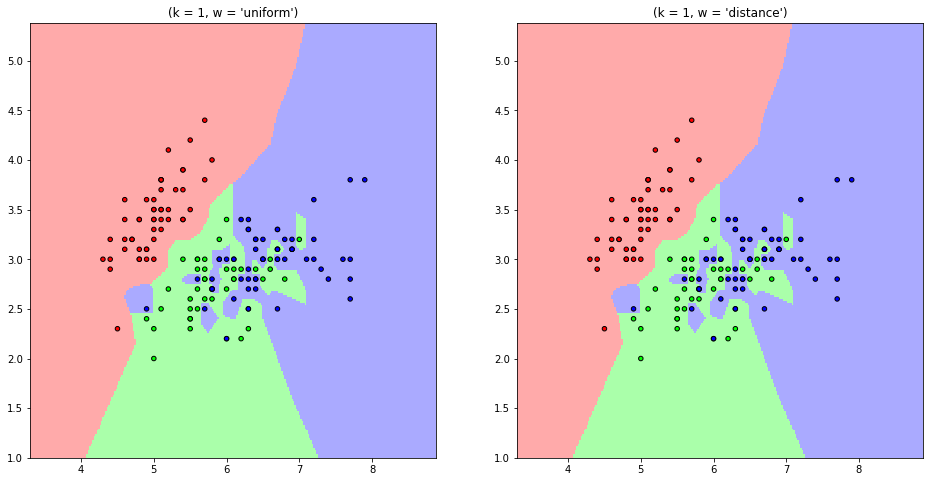

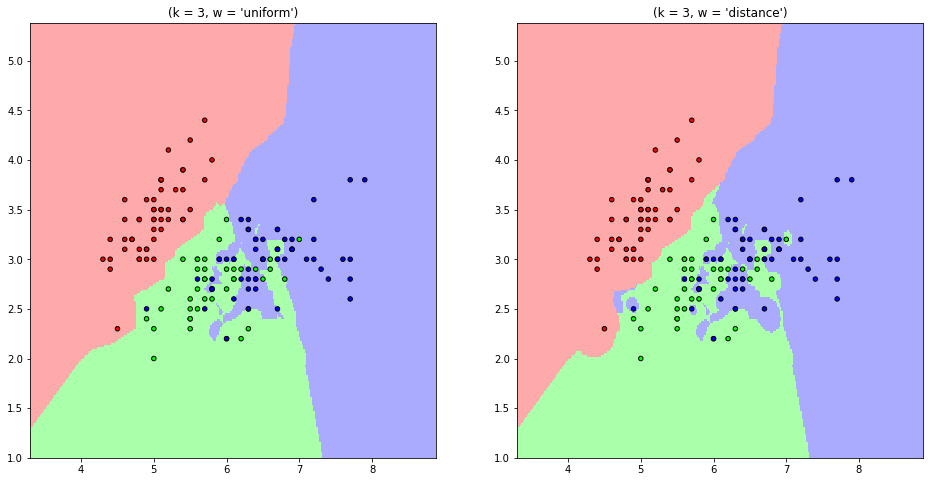

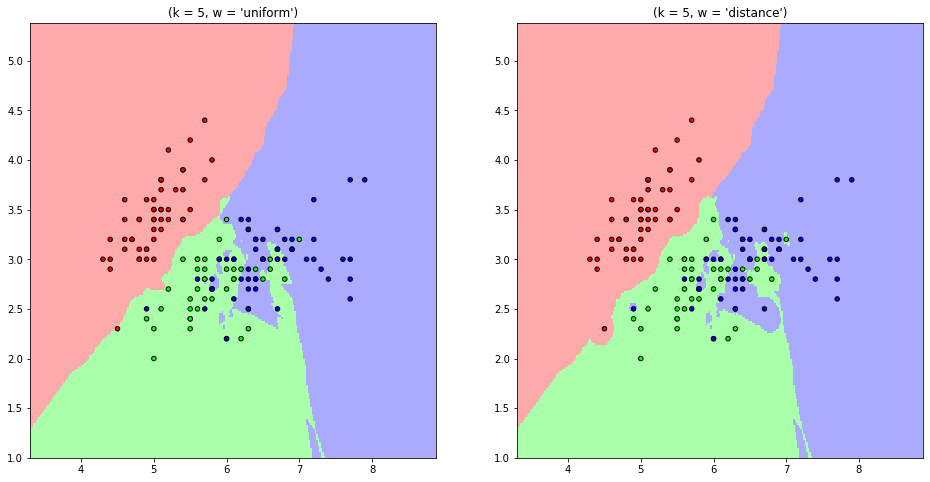

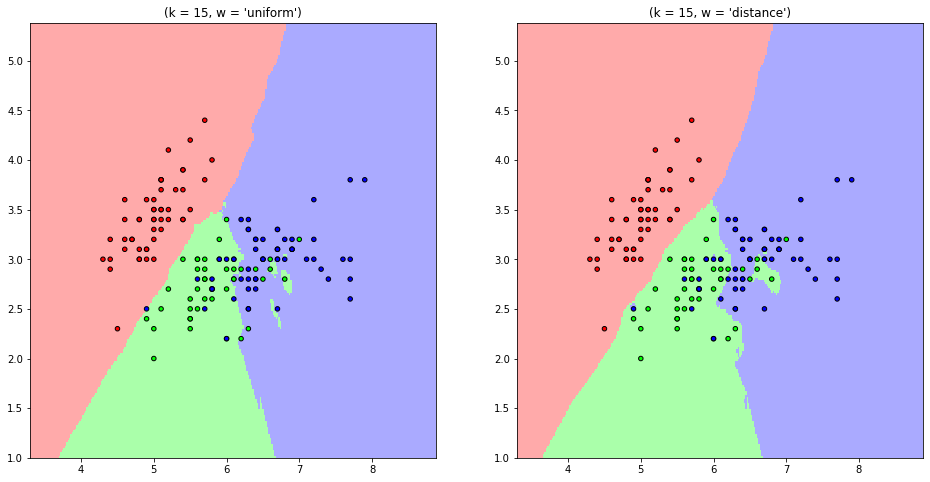

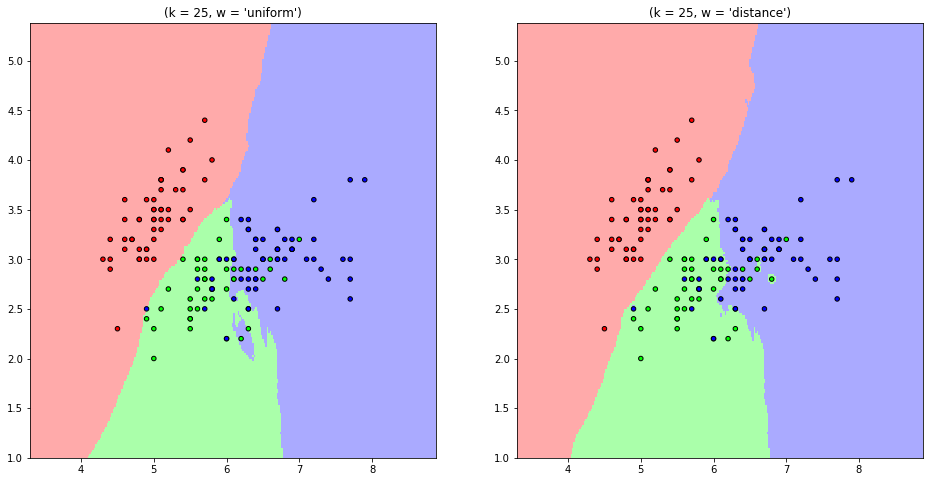

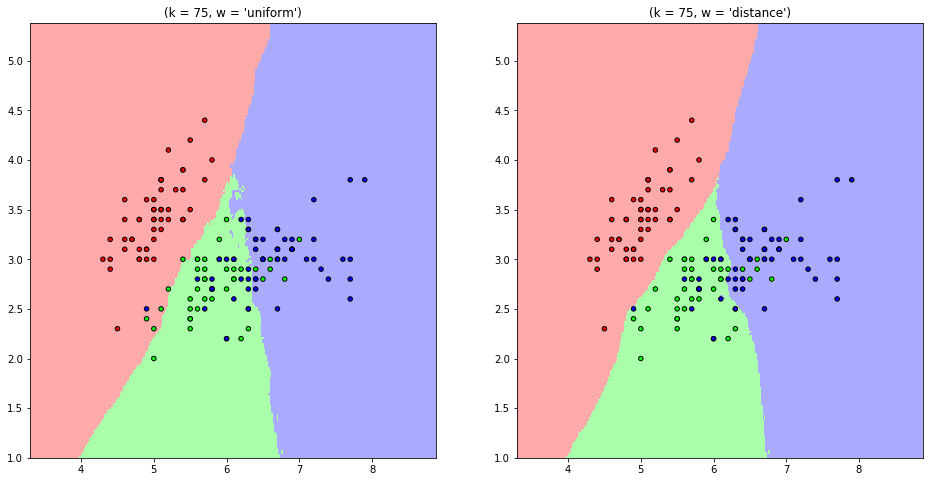

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

%matplotlib inline

#################################################################################################
# Adapted from: http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html #
#################################################################################################

# Import some data to play with.
iris = datasets.load_iris()

# We only take the first two features. We could avoid this ugly slicing by using a two-dim dataset.
X = iris.data[:, :2]
y = iris.target

print(X.shape)
print(y.shape)

h = .02  # step size in the mesh

# Create color maps.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Params.
Ks = [1, 3, 5, 15, 25, 75]
weights = ['uniform', 'distance']

# Iterating over params.
for n_neighbors in Ks:
    
    fig, ax = plt.subplots(1, len(weights), figsize=(16, 8))
    
    for i, weight in enumerate(weights):
        
        # We create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weight)
        clf.fit(X, y)
        
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax[i].pcolormesh(xx, yy, Z, cmap=cmap_light)
        
        ax[i].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
        ax[i].set_xlim(xx.min(), xx.max())
        ax[i].set_ylim(yy.min(), yy.max())
        ax[i].set_title("(k = %i, w = '%s')" % (n_neighbors, weight))

plt.show()